均方误差 (MSE): 24.291119474973513
决定系数 (R²): 0.668759493535632


C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10075\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

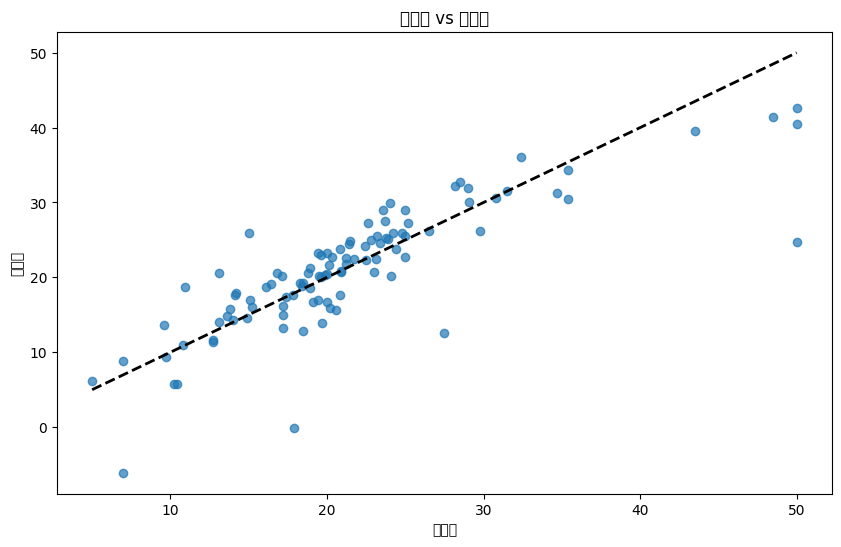

In [1]:
import matplotlib.pyplot as plt # 数据可视化
import pandas as pd # 序列高级函数
import numpy as np # 基础值算法

# 影响因素
# CRIM（人均犯罪率） ; NOX（一氧化氮浓度） ; RM（住宅房间数）; AGE（1940年以前建造的住宅比例）; DIS（距离波士顿五个主要就业中心的加权距离）
# RAD（高速公路可达性指数） ; TAX（每万美元的财产税率） ; PTRATIO（师生比）; B（黑人比例） ; LSTAT（低收入人群比例）; MEDV（自住房屋的中位数价格）

# 线性回归适用场景: 房价预测 ； 股票预测 ； 流量预测

# 数据基本处理
# 分割数据
# 特征工程-标准化
# 线性回归
# 模型评估
# 需要导入的API

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

# 加载数据集
file_path = r'C:\Users\10075\Downloads\Ai-Study\DataSet\Boston Housing.csv'
data = pd.read_csv(file_path)

# 修正目标列名，去除多余空格
data.rename(columns={'medv ': 'medv'}, inplace=True)

# 将数据分为特征和目标变量
X = data.drop('medv', axis=1)
y = data['medv']

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'均方误差 (MSE): {mse}')
print(f'决定系数 (R²): {r2}')

# 可视化预测值与实际值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('实际值 vs 预测值')
plt.show()
